In [1]:
# Import libraries
import os
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
join = os.path.join

In [2]:
# Get working version of scikit-learn
!pip install scikit-learn==1.0

In [3]:
#filepath = "../"
filepath = "../data/tmp"

In [4]:
# Load baseline 1 data

video1_csv = "baseline1_videos.csv"
title1_npy = "title_embedd_1.npy"
caption1_csv = "caption_embedd_1.csv"
caption1_npy = "caption_embedd_1.npy"
comment1_csv = "comment_embedd_1.csv"
comment1_npy = "comments_embedd_1.npy"

df_video1 = pd.read_csv(join(filepath, video1_csv), sep='\t')
df_caption1 = pd.read_csv(join(filepath, caption1_csv))
df_comment1 = pd.read_csv(join(filepath, comment1_csv))
title1 = np.load(join(filepath, title1_npy), allow_pickle=True)
caption1 = np.load(join(filepath, caption1_npy), allow_pickle=True)
comment1 = np.load(join(filepath, comment1_npy), allow_pickle=True)

df_video1 = df_video1.set_index('video_id')

In [5]:
print(len(df_video1))
df_video1.head()

2120


,Unnamed: 0,topic,title,normalized_annotation,num_views,likes,dislikes,num_comments,captions
video_id,,,,,,,,,
hOW9AjskoOo,0,911,The Shadow of Waco | Retro Report | The New Yo...,0,596113,5478,420,1688,it happened outside Waco Texas a heavily armed...
dIRcw45n9RU,1,911,Former Abortionist Dr. Levatino Destroys Pro-C...,0,520316,15965,640,6828,thanks for coming it's nice to see a good turn...
SMwXKl0odq8,2,911,Trump's Road to the White House (full film) | ...,0,1543110,12403,1721,5919,">> Tonight... >> I, Donald John Trump,\n do so..."
oHSehKtDyoI,3,911,The Strange Disappearance of D.B. Cooper,0,12129914,207614,7949,20664,"- This week on Buzzfeed Unsolved, we discuss t..."
N9COy7O7K-U,4,911,SHOCKINGLY OFFENSIVE AUDITIONS Have Simon Cowe...,0,9681212,91657,5576,18965,I'm Mason noise I'm 22 and I'm from\n Birmingh...


In [6]:
print(len(df_caption1))
df_caption1.head()

2120


,Unnamed: 0,video_id,idx
0,0,hOW9AjskoOo,0
1,1,dIRcw45n9RU,1
2,2,SMwXKl0odq8,2
3,3,oHSehKtDyoI,3
4,4,N9COy7O7K-U,4


In [7]:
print(len(df_comment1))
df_comment1.head()

177514


,Unnamed: 0,video_id,idx
0,0,hOW9AjskoOo,0
1,1,hOW9AjskoOo,1
2,2,hOW9AjskoOo,2
3,3,hOW9AjskoOo,3
4,4,hOW9AjskoOo,4


In [8]:
print(title1.shape)
print(caption1.shape)
print(caption1[0].shape)
print(comment1.shape)
print(comment1[0].shape)

(2120, 1, 768)
(2120,)
(5, 768)
(177514,)
(1, 768)


In [11]:
caption1_concat = np.empty((0, 768))
video1_concat = np.empty(0)
for i in range(len(caption1)):
    caption1_concat = np.concatenate((caption1_concat, caption1[i]), axis=0)
    video_id = df_caption1.iloc[i]["video_id"]
    try:
        misinfo_label = df_video1.loc[video_id]["normalized_annotation"]
        misinfo_label = int(misinfo_label)
    except:
        continue
    misinfo_values = np.array([misinfo_label for _ in range(caption1[i].shape[0])])
    video1_concat = np.concatenate((video1_concat, misinfo_values), axis=0)
print(caption1_concat.shape), print(video1_concat.shape)

(15574, 768)
(15560,)


(None, None)

In [12]:
comment1_concat = np.concatenate(comment1, axis=0)
print(comment1_concat.shape)

(178383, 768)


In [13]:
video1_concat_2 = []

for key, idx in df_comment1[['video_id', 'idx']].to_numpy():
    misinfo_label = df_video1.loc[key]["normalized_annotation"]
    try:
        misinfo_label = int(misinfo_label)
        video1_concat_2 += [misinfo_label] * int(comment1[idx].shape[0])
    except TypeError:
        pass

video1_concat_2 = np.array(video1_concat_2)
print(comment1_concat.shape), print(video1_concat_2.shape)

(178383, 768)
(177979,)


(None, None)

#### Visualizing titles

In [14]:
title1 = title1.squeeze()
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_title1 = tsne.fit_transform(title1)
X_embedded_title1.shape

(2120, 2)

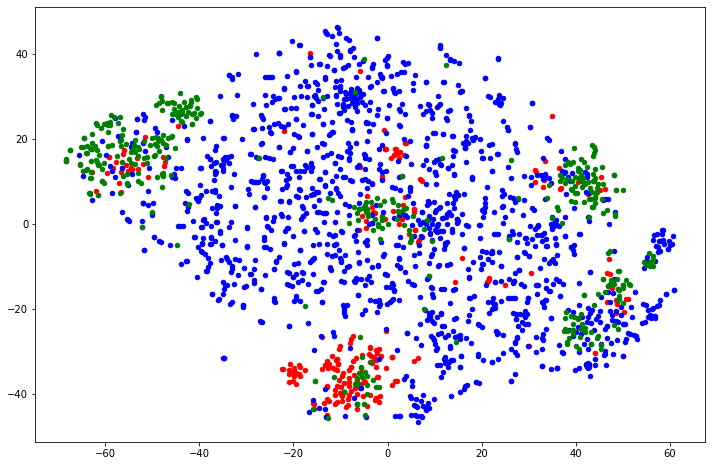

In [33]:
plt.rcParams["figure.figsize"] = (12, 8)
#plt.rcParams["figure.figsize"] = (15,15)

indices = df_video1["normalized_annotation"].to_numpy()
misinfo = np.where(indices == 1)
neutral = np.where(indices == 0)
debunking = np.where(indices == -1)

plt.scatter(X_embedded_title1[misinfo, 0], X_embedded_title1[misinfo, 1], color='r', s=20)
plt.scatter(X_embedded_title1[neutral, 0], X_embedded_title1[neutral, 1], color='b', s=20)
plt.scatter(X_embedded_title1[debunking, 0], X_embedded_title1[debunking, 1], color='g', s=20)

plt.show()

#### Visualizing captions

In [16]:
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_caption1 = tsne.fit_transform(caption1_concat)
X_embedded_caption1.shape

(15574, 2)

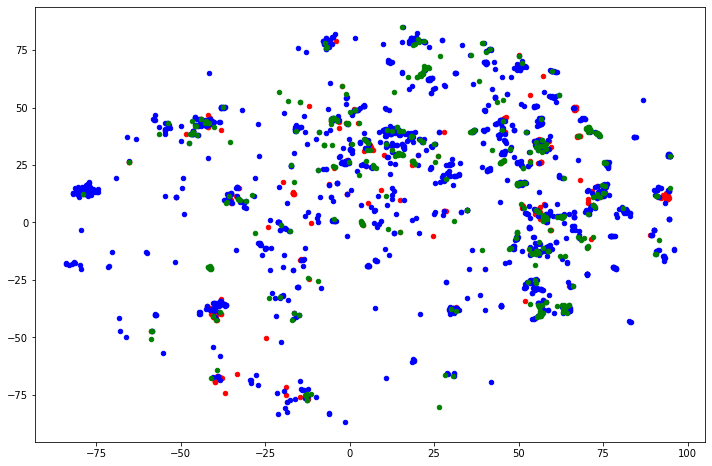

In [32]:
plt.rcParams["figure.figsize"] = (12, 8)
#plt.rcParams["figure.figsize"] = (15,15)

indices = df_video1["normalized_annotation"].to_numpy()
misinfo = np.where(indices == 1)
neutral = np.where(indices == 0)
debunking = np.where(indices == -1)

plt.scatter(X_embedded_caption1[misinfo, 0], X_embedded_caption1[misinfo, 1], color='r', s=20)
plt.scatter(X_embedded_caption1[neutral, 0], X_embedded_caption1[neutral, 1], color='b', s=20)
plt.scatter(X_embedded_caption1[debunking, 0], X_embedded_caption1[debunking, 1], color='g', s=20)

plt.show()

#### Visualizing comments

In [34]:
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
X_embedded_comment1 = tsne.fit_transform(comment1_concat)
X_embedded_comment1.shape

(178383, 2)

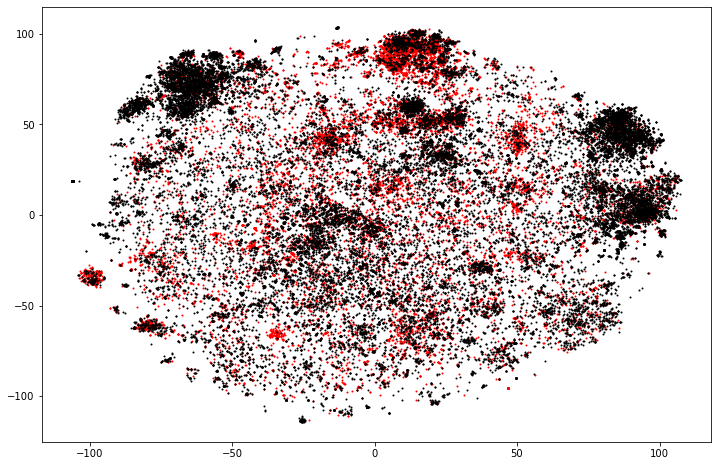

In [35]:
import random
k = 1 #0.05

plt.rcParams["figure.figsize"] = (12, 8)
#plt.rcParams["figure.figsize"] = (15,15)

misinfo = np.where(video1_concat_2 == 1)[0]
neutral = np.where(video1_concat_2 == 0)[0]
debunking = np.where(video1_concat_2 == -1)[0]
#print(np.unique(video1_concat_2))

emb_misinfo_x = X_embedded_comment1[misinfo, 0]
emb_misinfo_y = X_embedded_comment1[misinfo, 1]
n = emb_misinfo_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_misinfo_x = emb_misinfo_x[sampled_ind]
emb_misinfo_y = emb_misinfo_y[sampled_ind]

emb_neutral_x = X_embedded_comment1[neutral, 0]
emb_neutral_y = X_embedded_comment1[neutral, 1]
n = emb_neutral_x.shape[0]
sampled_ind = random.sample([i for i in range(n)], int(n * k))
emb_neutral_x = emb_neutral_x[sampled_ind]
emb_neutral_y = emb_neutral_y[sampled_ind]

emb_debunking_x = X_embedded_comment1[debunking, 0]
emb_debunking_y = X_embedded_comment1[debunking, 1]
n = emb_debunking_x.shape[0]
#print(n)
sampled_ind = random.sample([i for i in range(n)], int(n * k))
#print(len(sampled_ind))
emb_debunking_x = emb_debunking_x[sampled_ind]
emb_debunking_y = emb_debunking_y[sampled_ind]

plt.scatter(emb_misinfo_x, emb_misinfo_y, color='r', s=1)
#plt.scatter(emb_neutral_x, emb_neutral_y, color='b', s=1)
plt.scatter(emb_debunking_x, emb_debunking_y, color='k', s=1)

plt.show()